# Projeto ecommerce
## Resumo

**Simulando que**, uma empresa de comercio eletrônico que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário. Os clientes entram na loja, têm sessões/reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em aplicativos móveis ou em seu site.

***
Será feita uma análise exploratória para extrair informações relevantes para responder em quais midias investir para  maior faturamento: app ou site.

E também um modelo preditivo para prever futuros lucros baseado no historico dos clientes.
***

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [102]:
clientes = pd.read_csv("Ecommerce_Customers.csv")
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


***
### Traduzindo colunas

In [103]:
clientes.columns = ['email', 'endereco', 'avatar', 'duracao consulta estilista', 'tempo online app',
       'tempo online site', 'tempo de membro', 'valor anual gasto']

___
### Informações adicionais

In [104]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   email                       500 non-null    object 
 1   endereco                    500 non-null    object 
 2   avatar                      500 non-null    object 
 3   duracao consulta estilista  500 non-null    float64
 4   tempo online app            500 non-null    float64
 5   tempo online site           500 non-null    float64
 6   tempo de membro             500 non-null    float64
 7   valor anual gasto           500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Tendo uma visão geral das colunas que possam conter uma correlação para as próximas análises

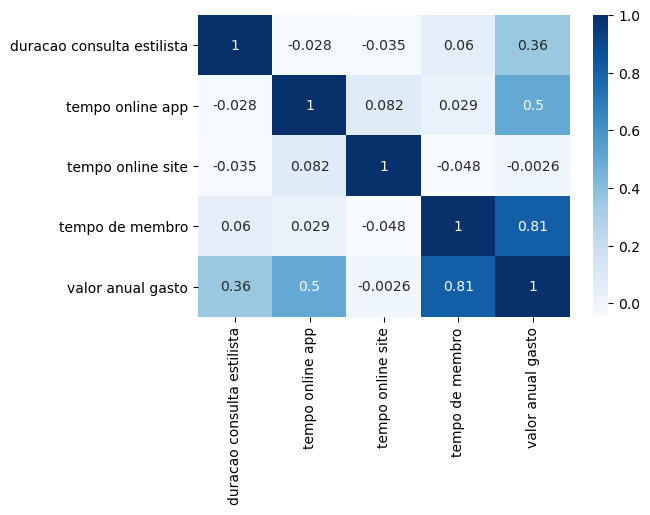

In [105]:
plt.figure(dpi=100)
sns.heatmap(clientes.corr(), cmap="Blues", annot=True)
plt.show()

#### OBS:
***

### Verificando se as correlações são Lineares

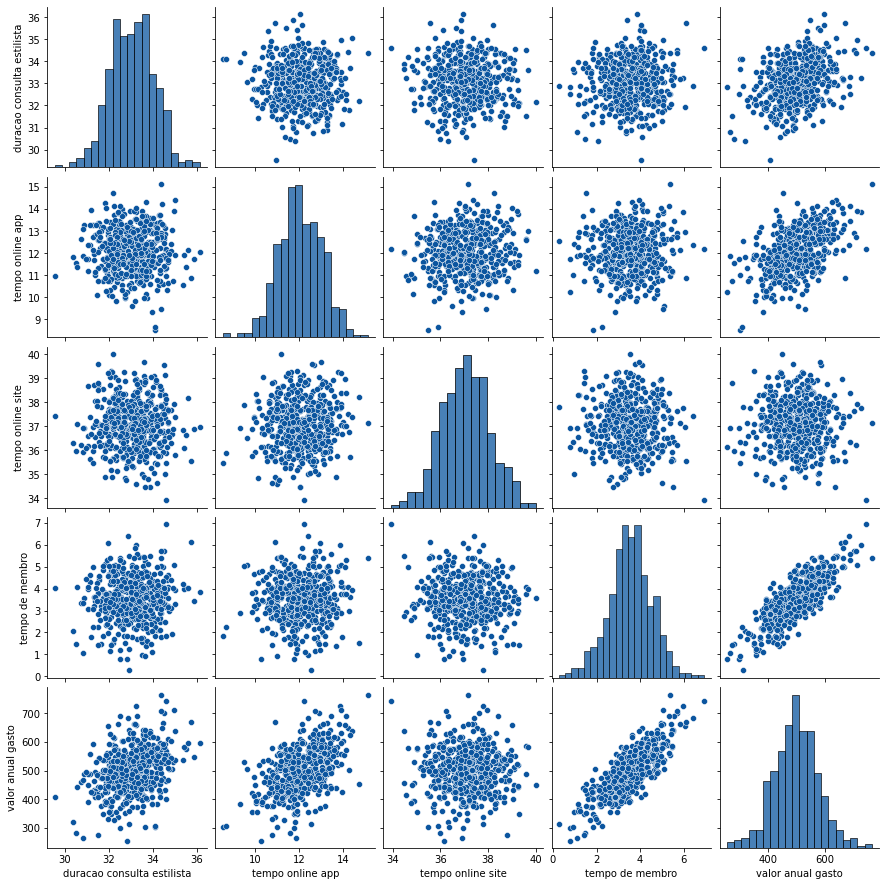

In [106]:
sns.pairplot(clientes)

OBS: É observado que o valor anual gasto tem uma considerável correlação linear com o tempo de membro
***

***
# **Analisando as correlações detectadas de forma mais detalhada**
***

### Visualizando a correlação entre valor gasto pelo cliente por ano, e quanto tempo ele é membro



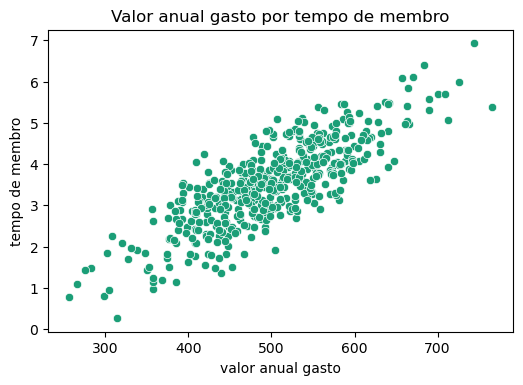

In [107]:
plt.figure(dpi=100)
sns.set_palette("Dark2")
plt.title("Valor anual gasto por tempo de membro")
sns.scatterplot(x=clientes['valor anual gasto'], y=clientes['tempo de membro'])
plt.show()

É notável que quanto mais antigo o cliente for, mais ele consome por ano
***

### Visualizando a correlação entre valor gasto pelo cliente por ano, e quanto tempo em media ele passa olhando o **aplicativo**

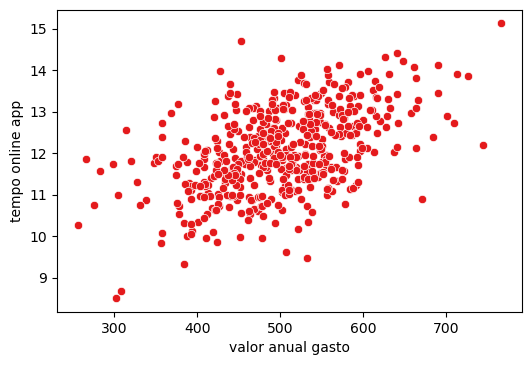

In [108]:
plt.figure(dpi=100)
sns.set_palette("Set1")
sns.scatterplot(x=clientes['valor anual gasto'], y=clientes['tempo online app'])
plt.show()

OBS: Podemos ver que quanto mais tempo no aplicativo, mais as pessoas tendem a comprar

***
###  Visualizando tempo gasto no **site** com as compras anuais dos clientes

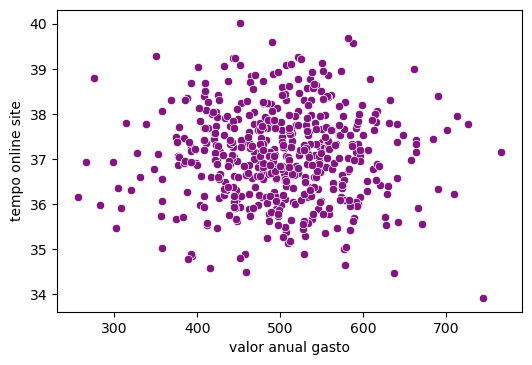

In [109]:
plt.figure(dpi=100)
sns.set_palette("BuPu_r")
sns.scatterplot(x=clientes['valor anual gasto'], y=clientes['tempo online site'])
plt.show()

Observamos que para quem efetua as compras pelo site, o tempo gasto no mesmo nao necessáriamente tem fator decisivo em suas compras

### Visualizando tempo na sessão com estilista com as compras anuais

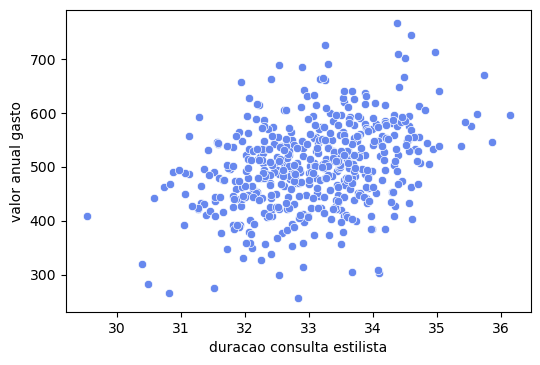

In [110]:
plt.figure(dpi=100)
sns.set_palette("coolwarm")
sns.scatterplot(y=clientes['valor anual gasto'], x=clientes['duracao consulta estilista'])
plt.show()

Quanto mais o cliente consulta o estilista profissional, mais ele tende a comprar

***
### Visualizando consultas ao estilista por tempo de membro

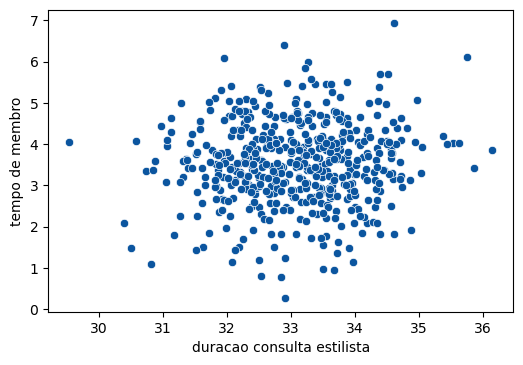

In [111]:
plt.figure(dpi=100)
sns.set_palette("Blues_r")
sns.scatterplot(y=clientes['tempo de membro'], x=clientes['duracao consulta estilista'])
plt.show()

É notável que os clientes mais novos nao consultam tanto os estilistas
***


# **Preparando os dados para inicio dos modelos**
Eliminando colunas, deixando apenas as numericas para a construção **deste modelo específico**

In [112]:
clientes = clientes.iloc[:,3:]
clientes.head(3)

,duracao consulta estilista,tempo online app,tempo online site,tempo de membro,valor anual gasto
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


# Treinando e testando os dados


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [114]:
X = clientes.iloc[:,:-1]
y = clientes.iloc[:,[-1]]

In [115]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=101)

In [116]:
lrmodel = LinearRegression()
gradmodel = GradientBoostingRegressor()
rfmodel = RandomForestRegressor()
adamodel = AdaBoostRegressor()
exmodel = ExtraTreesRegressor()

## Treinando os modelos

In [117]:
lrmodel.fit(Xtrain, ytrain)
gradmodel.fit(Xtrain, ytrain)
rfmodel.fit(Xtrain, ytrain)
adamodel.fit(Xtrain, ytrain)
exmodel.fit(Xtrain, ytrain)

ExtraTreesRegressor()

## Armazenando predição dos dados

In [118]:
lrpred = lrmodel.predict(Xtest)
gradpred = gradmodel.predict(Xtest)
rfpred = rfmodel.predict(Xtest)
adapred = adamodel.predict(Xtest)
expred = exmodel.predict(Xtest)

### Avaliando precisão do modelo

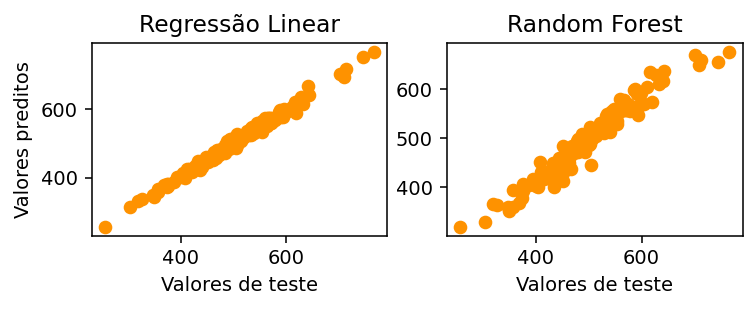

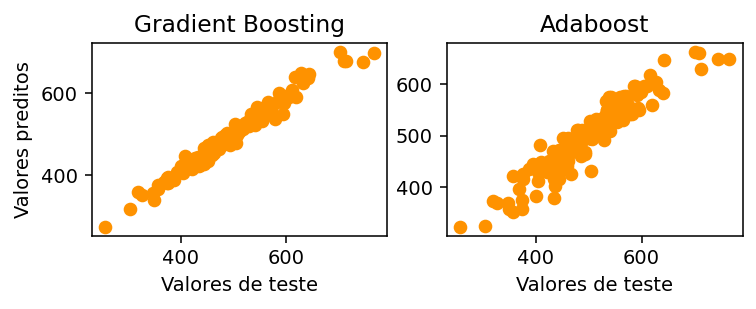

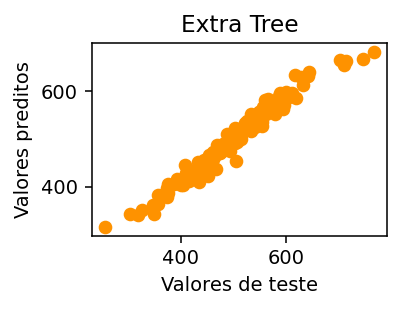

In [139]:
plt.figure(dpi=140)
plt.subplot(2,2,1)
sns.set_palette("Wistia_r")
plt.title("Regressão Linear")
plt.xlabel("Valores de teste")
plt.ylabel("Valores preditos")
plt.scatter(ytest, lrpred)
#
plt.subplot(2,2,2)
sns.set_palette("Wistia_r")
plt.title("Random Forest")
plt.xlabel("Valores de teste")
plt.scatter(ytest, rfpred)
#
plt.figure(dpi=140)
plt.subplot(2,2,1)
sns.set_palette("Wistia_r")
plt.title("Gradient Boosting")
plt.ylabel("Valores preditos")
plt.xlabel("Valores de teste")
plt.scatter(ytest, gradpred)
#
plt.subplot(2,2,2)
sns.set_palette("Wistia_r")
plt.title("Adaboost")
plt.xlabel("Valores de teste")
plt.scatter(ytest, adapred)
#
plt.figure(dpi=140)
plt.subplot(2,2,1)
sns.set_palette("Wistia_r")
plt.title("Extra Tree")
plt.ylabel("Valores preditos")
plt.xlabel("Valores de teste")
plt.scatter(ytest, expred)
plt.show()

O modelo de Regressão Linear teve uma proximidade considerável entre o **eixo x(valores de teste)** e o **eixo y(valores da predição)** em relação aos outros modelos
***

## Score dos modelos

In [144]:
lrscore = lrmodel.score(Xtest, ytest)*100
rfscore = rfmodel.score(Xtest, ytest)*100
gradscore = gradmodel.score(Xtest, ytest)*100
adascore = adamodel.score(Xtest, ytest)*100
exscore = exmodel.score(Xtest, ytest)*100

scores = [lrscore, rfscore, gradscore, adascore, exscore]
modelos = "LienarRegression RandomForest GradientBoosting Adaboost ExtraTree".split()

scores = pd.DataFrame({"Modelos":modelos, "Score":scores}).sort_values(by="Score",ascending=False)
scores

,Modelos,Score
0,LienarRegression,98.900462
2,GradientBoosting,96.637375
4,ExtraTree,95.199730
1,RandomForest,93.804127
3,Adaboost,87.945638


***
# Avaliando desempenho dos Modelos

### Verificando margem de erros

In [146]:
rmselr = np.sqrt(metrics.mean_squared_error(ytest, lrpred))
rmsegrad = np.sqrt(metrics.mean_squared_error(ytest, gradpred))
rmsetree = np.sqrt(metrics.mean_squared_error(ytest, expred))
rmseada = np.sqrt(metrics.mean_squared_error(ytest, adapred))
rmserf = np.sqrt(metrics.mean_squared_error(ytest, rfpred))

rmse = [rmselr, rmsegrad, rmsetree, rmseada, rmserf]
modelos = "LinearRegression GradientBoosting ExtraTree Adaboost RandomForest".split()

rmses = pd.DataFrame({"Modelo":modelos,"RMSE":rmse})
rmses

,Modelo,RMSE
0,LinearRegression,8.933815
1,GradientBoosting,15.623242
2,ExtraTree,18.666581
3,Adaboost,29.580400
4,RandomForest,21.207194


Como esperado, a menor margem de erros vem do modelo Regressao Linear
***

# **Insight de conclusão**
***
Baseado nos gráficos e resultados adquiridos, as compras realizadas pelo app indicam um controle maior sobre o histórico dos clientes, também é notável o quanto os estilistas agregam nos lucros anuais da empresa, então seria mais vantajoso conseguir mais membros através do app para gerar mais lucros e continuar investindo nos estilistas, também foi verificado que os clientes mais antigos costumam consumir mais durante o ano.
